# Diferential Equation Solver and Grapher on Sympy
### Instructions
- Change dot_x and dot_y for any function f(x,y) and g(x,y) you like
- For plotting, set the plot boundaries 
- For the trajectory, set the starting point and time 

In [66]:
# Bulk Imports and setup
import matplotlib.pyplot as plt
import numpy as np
import sympy as sm
from sympy.utilities.lambdify import lambdify, implemented_function
x, y, lamda = sm.symbols('x, y, lamda')

def move_sympyplot_to_axes(p, ax):
    backend = p.backend(p)
    backend.ax = ax
    backend._process_series(backend.parent._series, ax, backend.parent)
    backend.ax.spines['right'].set_color('none')
    backend.ax.spines['bottom'].set_position('zero')
    backend.ax.spines['top'].set_color('none')
    plt.close(backend.fig)



In [67]:
# Defining the equations via sympy
dot_x = x**2 -y   # f(x,y)
dot_y = -2*x+y  # g(x,y)

In [68]:
dot_x

x**2 - y

In [69]:
dot_y

-2*x + y

In [70]:
# Setting equations to zero and computing Fixed Points
dot_x_Equal, dot_y_Equal = sm.Eq(dot_x, 0), sm.Eq(dot_y, 0)
equilibria = sm.solve((dot_x_Equal, dot_y_Equal), x, y, dict=True)
equilibria

[{x: 0, y: 0}, {x: 2, y: 4}]

In [71]:
## A matrix from dot(X)=AX (if system is linear)
# We contruct the vector <f(x,y), g(x,y)>.
A_vector = sm.Matrix([dot_x, dot_y])
# Jacobian for the A_vector. In a linear system this gives the A matrix from dot(X)=AX
A_matrix = A_vector.jacobian(([x, y]))
A_matrix

Matrix([
[2*x, -1],
[ -2,  1]])

In [72]:
# Calculates Characteristic Polynomial
charpoly = A_matrix.charpoly() 
charpoly 

PurePoly(lambda**2 + (-2*x - 1)*lambda + 2*x - 2, lambda, domain='ZZ[x]')

In [73]:
# Calculates eigenvals for each eq
# The list is of the form [{eqiuilibria}, {eiganval: multiplicity}]
# Note, each eigenval is presented as {eiganval: multiplicity}
eigenval_list = [[eq, A_matrix.subs((x, eq[x]), (y, eq[y])).eigenvals()]
              for eq in equilibria]
# As eigenvals are stored as a dict, to show the first one we have to extract it in this way. 
next(iter(eigenval_list[0][1])) #eigenval_list[#equilibria][0=point, eigenval is always 1]

x - sqrt(4*x**2 - 4*x + 9)/2 + 1/2

In [74]:
# Calculates eigenvecs for each eq
# The list is of the form [{eqiuilibria}, eigenvect]
eigenvec_list = [[eq, A_matrix.subs((x, eq[x]), (y, eq[y])).eigenvects()[_][2][0]]
              for _, eq in enumerate(equilibria)]
eigenvec_list[0][1] # eigenvec_list[#equilibria][eigenvect is always 1]


Matrix([
[-x/2 + sqrt(4*x**2 - 4*x + 9)/4 + 1/4],
[                                    1]])

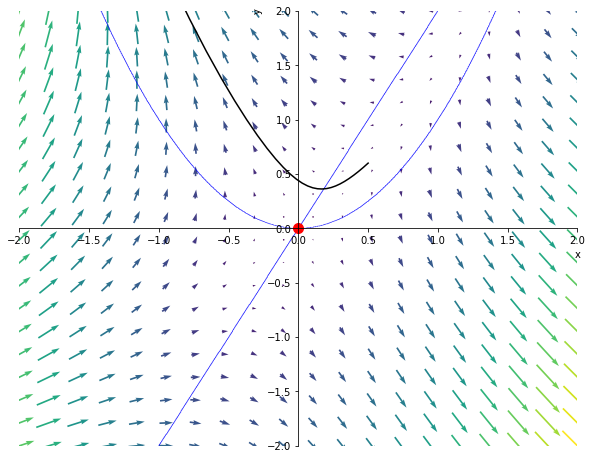

In [75]:
# Ploting  parameters
fig = plt.figure(figsize=(10,8))
ax = fig.add_subplot(1,1,1)
# ax.set_title("Sistema diferencial")

# Setting Plot Boundaries (needed of sympy)
x_min, y_min, y_max, x_max = -2, -2, 2, 2
# For plotting the trajectory
time, dt = 50, 0.1
x_0, y_0 = 0.5, 0.6 

#################################
# Plot fixed points
for point in equilibria:
    ax.plot(point[x],point[y],"red", marker = "o", markersize = 10.0)
    

# To plot we translate from sympy to numpy
x_movement = lambdify((x, y), dot_x) 
y_movement = lambdify((x, y), dot_y)

# define a grid and compute direction at each point
x_line = np.linspace(x_min, x_max, 20)
y_line = np.linspace(y_min, y_max, 20)

# Plot a singular trayectory
x_list= [x_0]
y_list = [y_0]
for i in range(time):
    x_list.append(x_list[i] + (x_movement(x_list[i], y_list[i])) * dt)
    y_list.append(y_list[i] + (y_movement(x_list[i], y_list[i])) * dt)

ax.plot(x_list, y_list, color="black")

# Quiverplot
# create a grid and set the dir vecs
X, Y = np.meshgrid(x_line, y_line)               
x_dir, y_dir = x_movement(X,Y), y_movement(X,Y)  
# prepare the colour
M = (np.hypot(x_dir, y_dir))                                                   
plt.quiver(X, Y, 
           x_dir, 
           y_dir,
           M,
           pivot='mid')

# Plot Nullclines
p1 = sm.plot_implicit(dot_x_Equal, (x, x_min, x_max), (y, y_min, y_max), show= False)
p2 = sm.plot_implicit(dot_y_Equal, (x, x_min, x_max), (y, y_min, y_max), show= False)

move_sympyplot_to_axes(p1, ax)
move_sympyplot_to_axes(p2, ax)

plt.show()


# Credit Where Credit is due
- http://systems-sciences.uni-graz.at/etextbook/sw2/phpl_python.html
- https://stackoverflow.com/questions/60325325/putting-together-plots-of-matplotlib-and-sympy
- Dynamical Systems with Applications Using Python - Stephen Lynch (2018)